<a href="https://colab.research.google.com/github/M-8-ops/M-8-Portfolio.github.io/blob/main/Copy_of_kernel_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVM

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
print(X_train)

[[-1.68062015e+00 -5.92416706e-01]
 [ 8.69241193e-01  5.63566526e-01]
 [-6.01832657e-01 -1.03702564e+00]
 [ 9.67312783e-01 -1.15558802e+00]
 [-2.09546297e-01 -5.62776110e-01]
 [ 1.82740063e-01  8.00691292e-01]
 [-4.05689477e-01  1.30458142e+00]
 [ 1.16345596e+00  5.04285335e-01]
 [ 7.71169603e-01  2.96801165e-01]
 [ 6.73098013e-01 -8.88822663e-01]
 [ 3.78883243e-01 -2.96010749e-01]
 [ 4.76954833e-01 -4.73854323e-01]
 [-2.09546297e-01  1.18957591e-01]
 [ 3.78883243e-01  8.93169951e-02]
 [-9.94119017e-01  8.00691292e-01]
 [-6.99904247e-01  1.39350321e+00]
 [ 3.78883243e-01 -5.03494919e-01]
 [ 3.78883243e-01 -5.03494919e-01]
 [-1.68062015e+00  3.85722952e-01]
 [ 8.69241193e-01 -8.29541472e-01]
 [-9.94119017e-01 -1.12594743e+00]
 [-2.09546297e-01  5.96763994e-02]
 [ 1.16345596e+00 -1.21486922e+00]
 [-2.09546297e-01  6.52488313e-01]
 [-1.34031173e-02  1.78238782e-01]
 [-5.03761067e-01  1.42314380e+00]
 [-1.11474707e-01  1.78238782e-01]
 [-1.68062015e+00  5.04285335e-01]
 [ 8.46684727e-02 -5

In [6]:
print(y_train)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0]


In [7]:
print(X_test)

[[-2.89053269e-01 -1.11810479e+00]
 [-1.89100270e-02 -3.15568669e-01]
 [-2.89053269e-01  1.31816558e+00]
 [-1.89100270e-02  1.43281360e+00]
 [-1.18953074e+00  1.31816558e+00]
 [-1.08957774e-01 -2.00920651e-01]
 [-1.72981723e+00 -1.03211878e+00]
 [ 8.81567447e-01  4.86967455e-01]
 [-7.39292006e-01 -1.54803486e+00]
 [ 7.91519700e-01  1.97739168e+00]
 [-4.69148764e-01 -2.86620044e-04]
 [-1.89100270e-02  2.83753844e-02]
 [-3.79101017e-01 -2.86620044e-04]
 [ 7.91519700e-01  1.69077164e+00]
 [ 1.24175844e+00  2.86333424e-01]
 [ 1.51190168e+00  1.74809565e+00]
 [ 1.87209267e+00  3.14995428e-01]
 [-1.09948300e+00 -4.01554682e-01]
 [-1.00943525e+00  4.29643446e-01]
 [ 1.87209267e+00  8.59573512e-01]
 [ 7.11377205e-02  8.56993932e-02]
 [ 9.71615195e-01  4.58305450e-01]
 [ 4.31328710e-01  1.92006768e+00]
 [ 7.01471952e-01 -8.31484748e-01]
 [ 5.21376458e-01 -1.31873882e+00]
 [-1.18953074e+00 -1.63402087e+00]
 [ 1.69199717e+00 -7.16836730e-01]
 [ 8.81567447e-01  5.70373888e-02]
 [ 1.24175844e+00 -1

In [8]:
print(y_test)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0]


## Training the Kernel SVM model on the Training set

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

## Predicting a new result

In [10]:
classifier.predict(sc.transform([[27,84000]]))

array([0])

## Predicting the Test set results

In [11]:
y_predict = classifier.predict(X_test)

print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))#comparing predictions with real purchased decisions

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_predict)
print(cm)
accuracy_score(y_test,y_predict)

[[50  8]
 [ 4 38]]


0.88

## Visualising the Training set results

<ipython-input-13-93a8b7c42f88>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


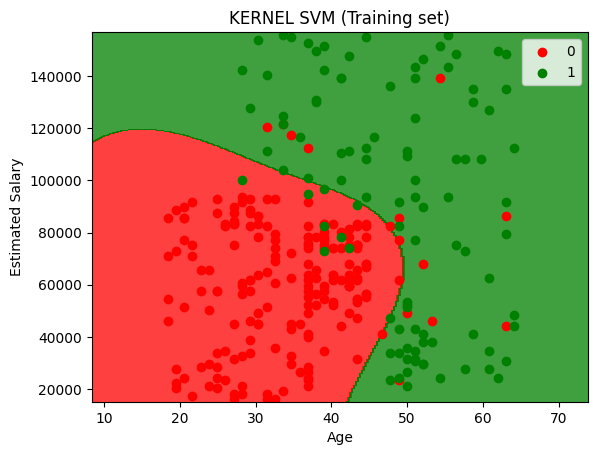

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KERNEL SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-14-bda0000e6dcf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


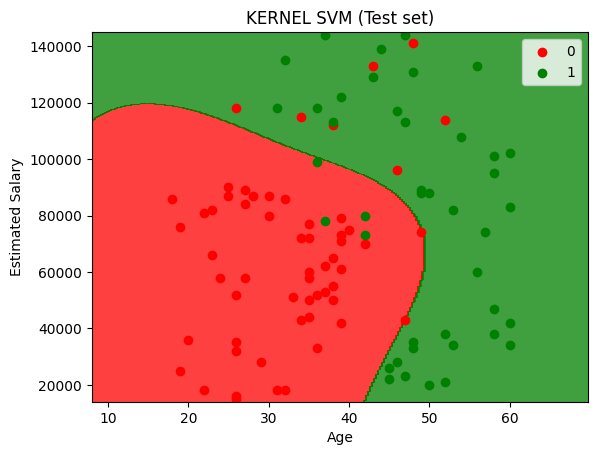

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KERNEL SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()